# Simple Linear Regression by TensorFlow 2

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


## Train Data

In [20]:
x_data = [1, 2, 3, 4, 5]
y_data = [7, 9, 11, 13, 15]

## Step 1: Hypothesis (가설 or 모델)

In [21]:
# 임의의 값으로 변수 설정
W = tf.Variable(5.0)
b = tf.Variable(10.0)

# 가설
# y = wx + b (y = 2X + 5)
hypothesis = W * x_data + b

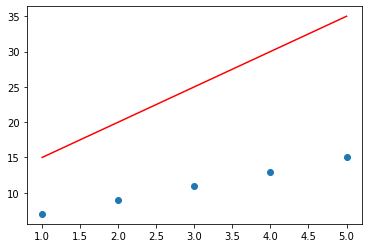

In [22]:
# 가설과 트레이닝 데이터 표시
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.show()

## Step 2: Cost Function (손실 함수)

In [23]:
# tf.reduce_mean(): 평균
# tf.square(a): a^2
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

## Step 3: Optimizer (최적화 or 최소화)

In [24]:
# 경사하강법
# tf.GradientTape() 사용
learning_rate = 0.01

## 훈련

In [26]:
# 훈련 반복 횟수 설정
epoch = 1000
for i in range(epoch):
    # Gradient descent (경사하강법)
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    # 경사하강법으로 w, b의 기울기 값(미분)을 얻는다.
    W_grad, b_grad = tape.gradient(cost, [W, b])
    # w, b의 값을 업데이트
    # a.assign_sub(b): a = a - b
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    # 10번에 한번 값 출력
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    0|    1.2382|    7.7503|  1.386172
   10|    1.2636|    7.6587|  1.295390
   20|    1.2881|    7.5702|  1.210553
   30|    1.3118|    7.4846|  1.131274
   40|    1.3347|    7.4019|  1.057185
   50|    1.3569|    7.3219|  0.987949
   60|    1.3783|    7.2446|  0.923247
   70|    1.3990|    7.1698|  0.862782
   80|    1.4190|    7.0976|  0.806278
   90|    1.4384|    7.0277|  0.753475
  100|    1.4571|    6.9602|  0.704129
  110|    1.4751|    6.8949|  0.658014
  120|    1.4926|    6.8318|  0.614921
  130|    1.5095|    6.7708|  0.574649
  140|    1.5258|    6.7119|  0.537015
  150|    1.5416|    6.6548|  0.501845
  160|    1.5569|    6.5997|  0.468979
  170|    1.5717|    6.5465|  0.438266
  180|    1.5859|    6.4950|  0.409563
  190|    1.5997|    6.4452|  0.382741
  200|    1.6130|    6.3971|  0.357674
  210|    1.6259|    6.3505|  0.334250
  220|    1.6384|    6.3056|  0.312360
  230|    1.6504|    6.2621|  0.291903
  240|    1.6621|    6.2201|  0.272786
  250|    1.6733|    6.17

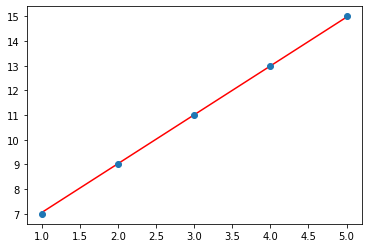

In [27]:
# 훈련 후의 가설(모델)과 트레이닝 데이터 표시
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.show()

## Predict (예측)

In [28]:
# 가설: y = 2x + 5
# x: 20 -> y: 45
y = W * 20 + b
print(y)

tf.Tensor(44.576317, shape=(), dtype=float32)
